In [1]:
%autosave 10
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures


Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
df = pd.read_csv(r'C:\Users\rahul\Downloads\Technocolab Assignment\Credit Card Default Prediction\cleaned_data.csv')
df['default payment next month'].mean()


0.2217971797179718

In [3]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()


In [5]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
my_new_lr.C = 0.1
my_new_lr.solver = 'newton-cg'

In [7]:
my_new_lr

LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')

In [8]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [9]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')

In [11]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [12]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

# Generating synthetic data

In [14]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

# Data for a Linear Regression

In [15]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept
mpl.rcParams['figure.dpi'] = 400

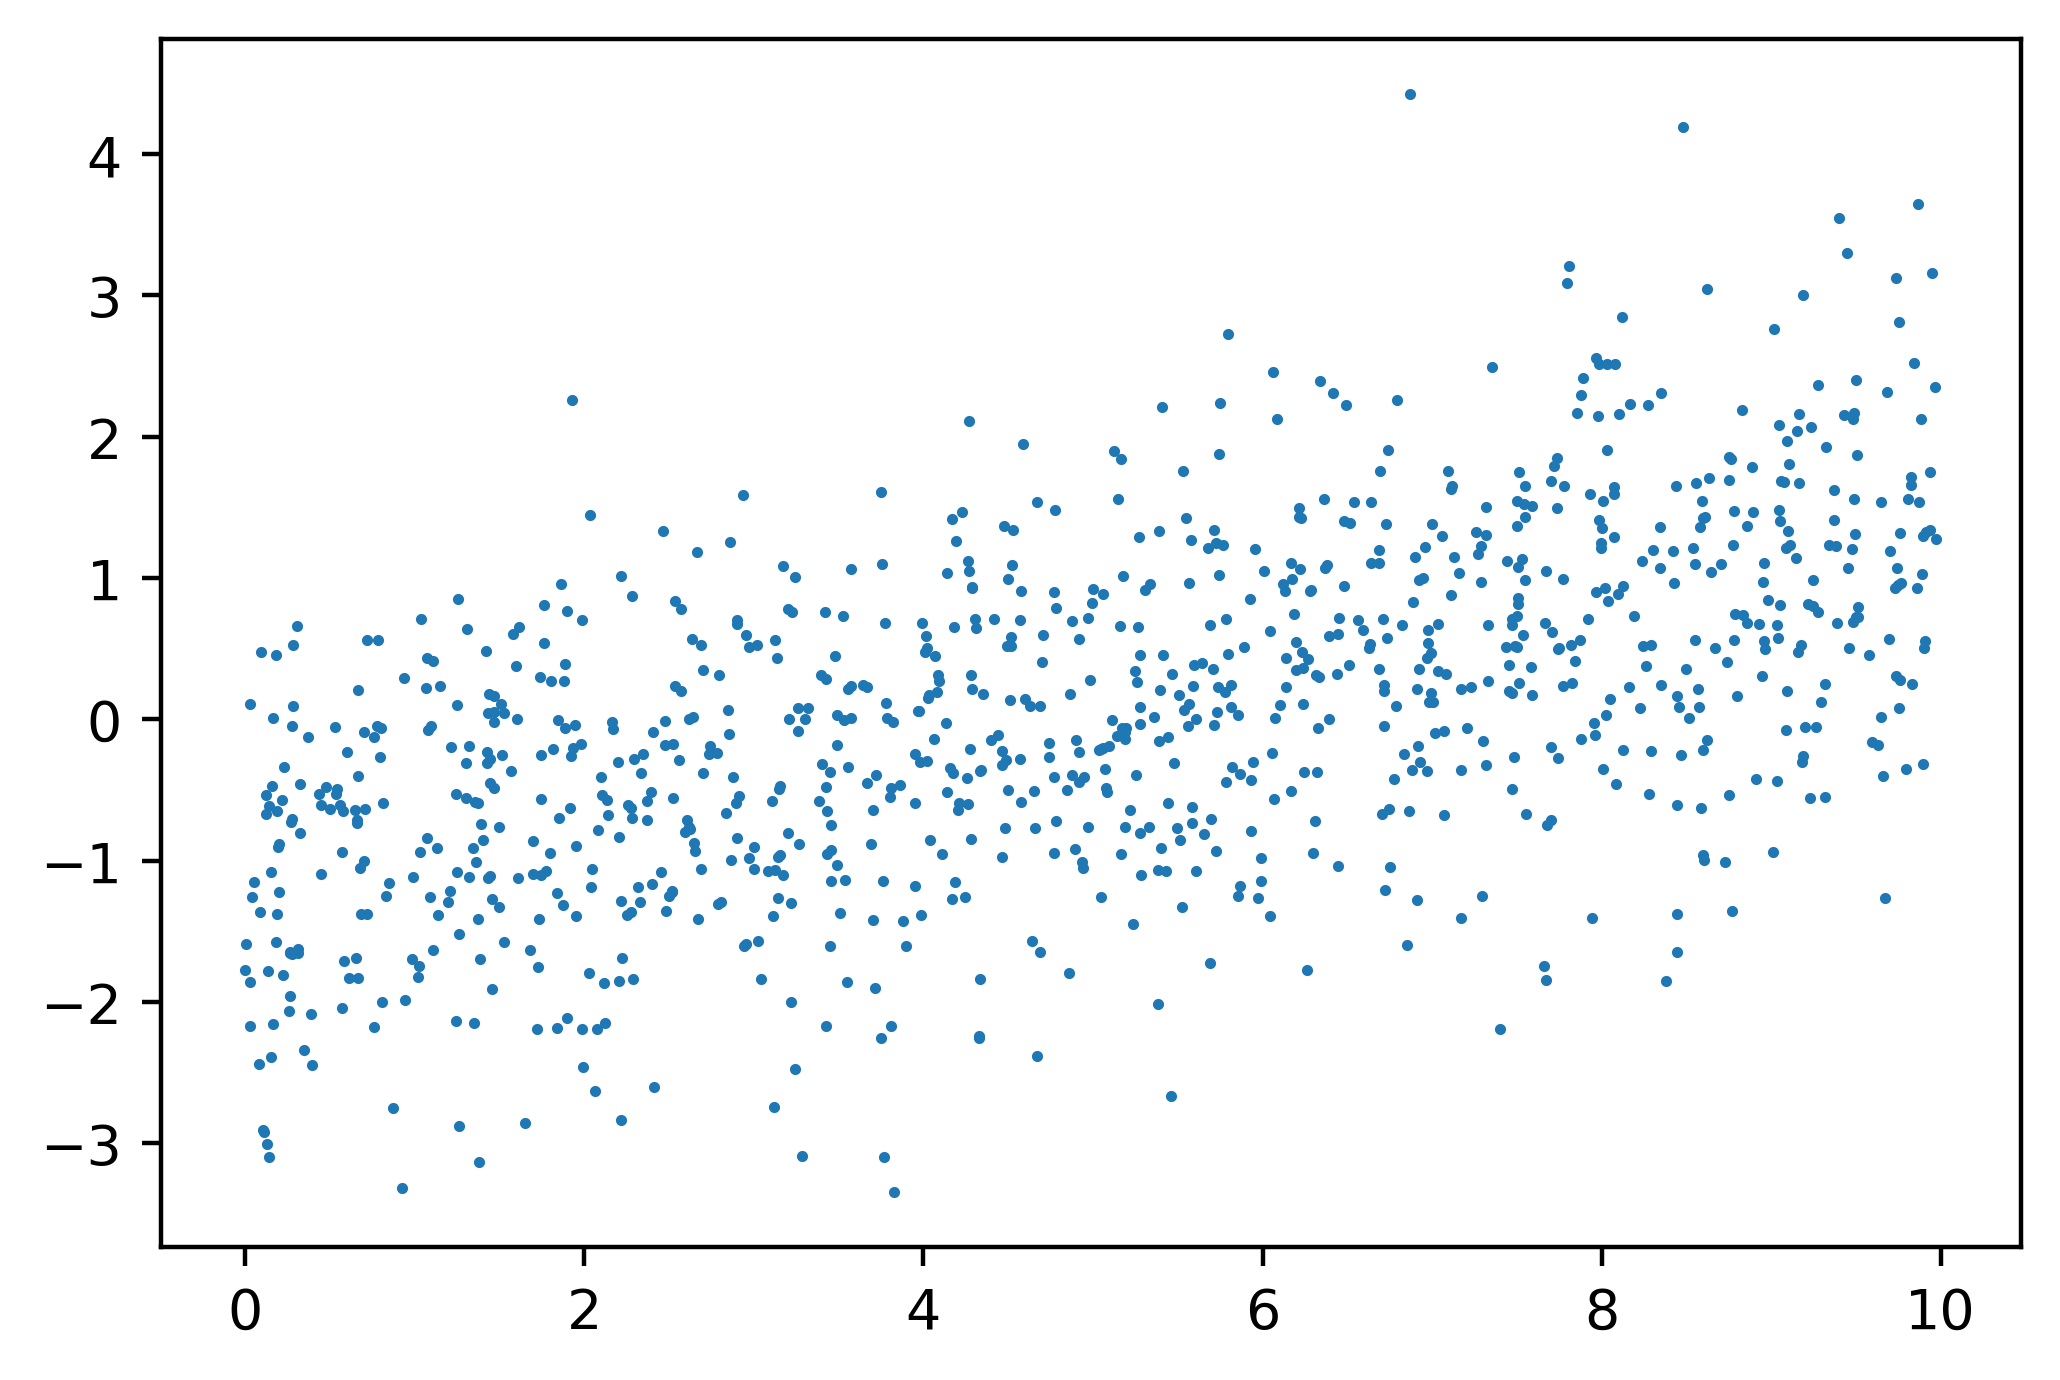

In [16]:
plt.scatter(X,y,s=1)

# Linear regression in Scikit-Learn

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X.reshape(-1,1), y)

LinearRegression()

In [19]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825886
[0.24002588]


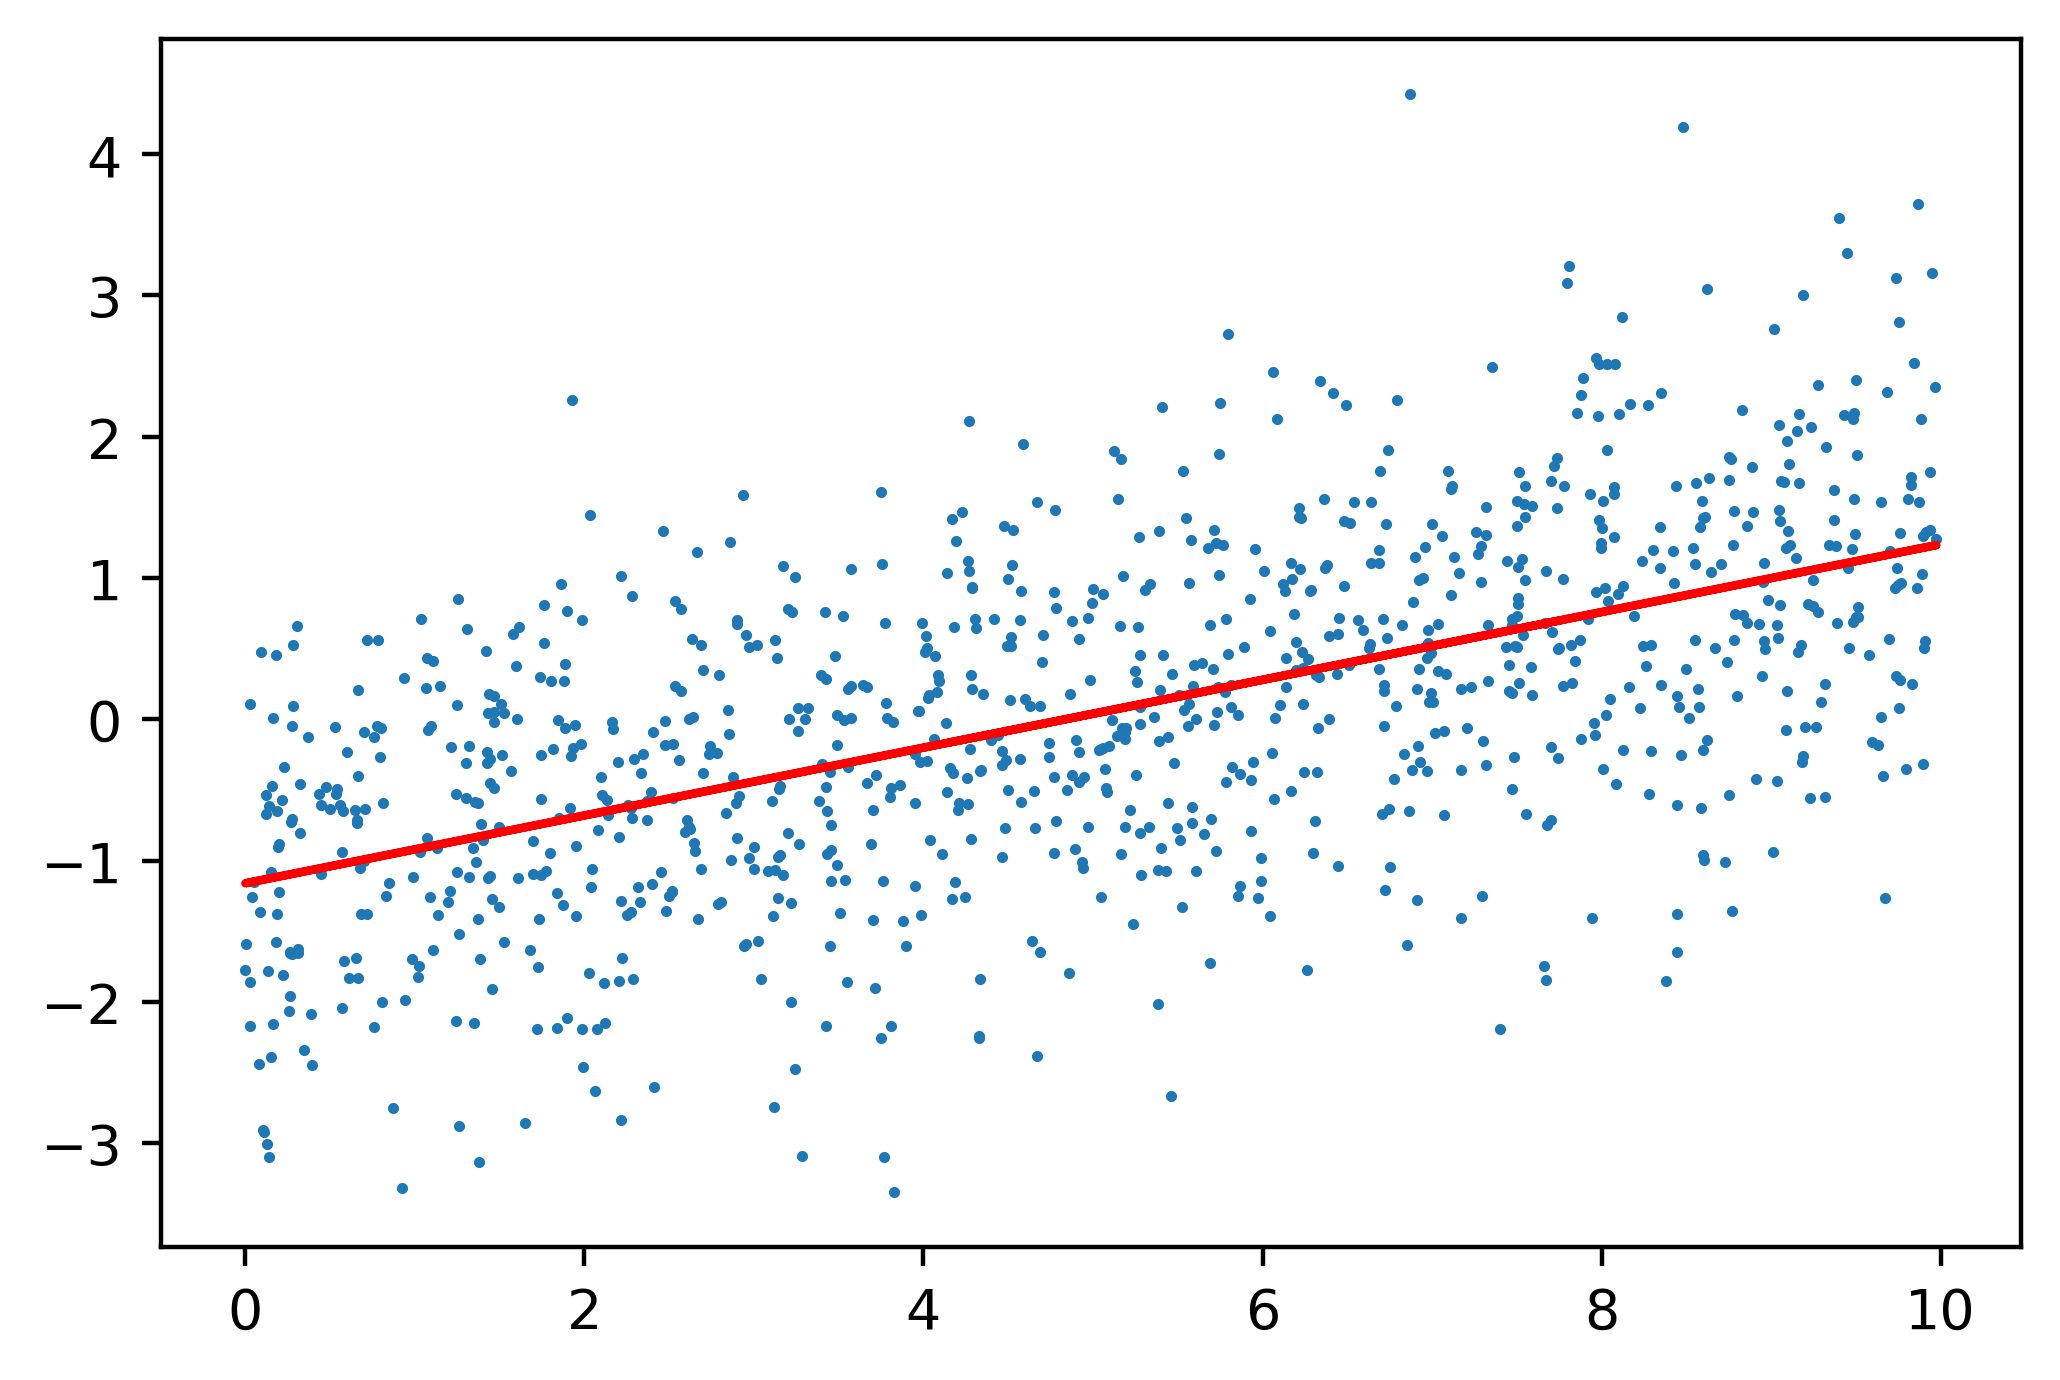

In [20]:
y_pred = lin_reg.predict(X.reshape(-1,1))
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [22]:
np.mean(y_train)

0.223102526838873

In [23]:
np.mean(X_test)

1.836864804050253

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')

In [27]:
y_pred = example_lr.predict(X_test)

# Accuracy

In [28]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [29]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [30]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

# Calculating the True and False Positive and Negative Rates and Confusion Matrix

In [31]:
P = sum(y_test)
TP = sum( (y_test==1) & (y_pred==1) )
TPR = TP/P
FN = sum( (y_test==1) & (y_pred==0) )
FNR = FN/P
N = sum(y_test==0)
TN = sum( (y_test==0) & (y_pred==0))
FP = sum( (y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [32]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [33]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77460613, 0.22539387],
       [0.77460613, 0.22539387],
       [0.79038396, 0.20961604],
       ...,
       [0.79038396, 0.20961604],
       [0.79038396, 0.20961604],
       [0.79038396, 0.20961604]])

In [34]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [35]:
prob_sum.shape

(5333,)

In [36]:
np.unique(prob_sum)

array([1.])

In [37]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22539387, 0.22539387, 0.20961604, ..., 0.20961604, 0.20961604,
       0.20961604])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.20961604, 0.21459552, 0.219575  , 0.22455447, 0.22953395,
        0.23451343, 0.2394929 , 0.24447238, 0.24945185, 0.25443133,
        0.25941081]),
 <a list of 10 Patch objects>)

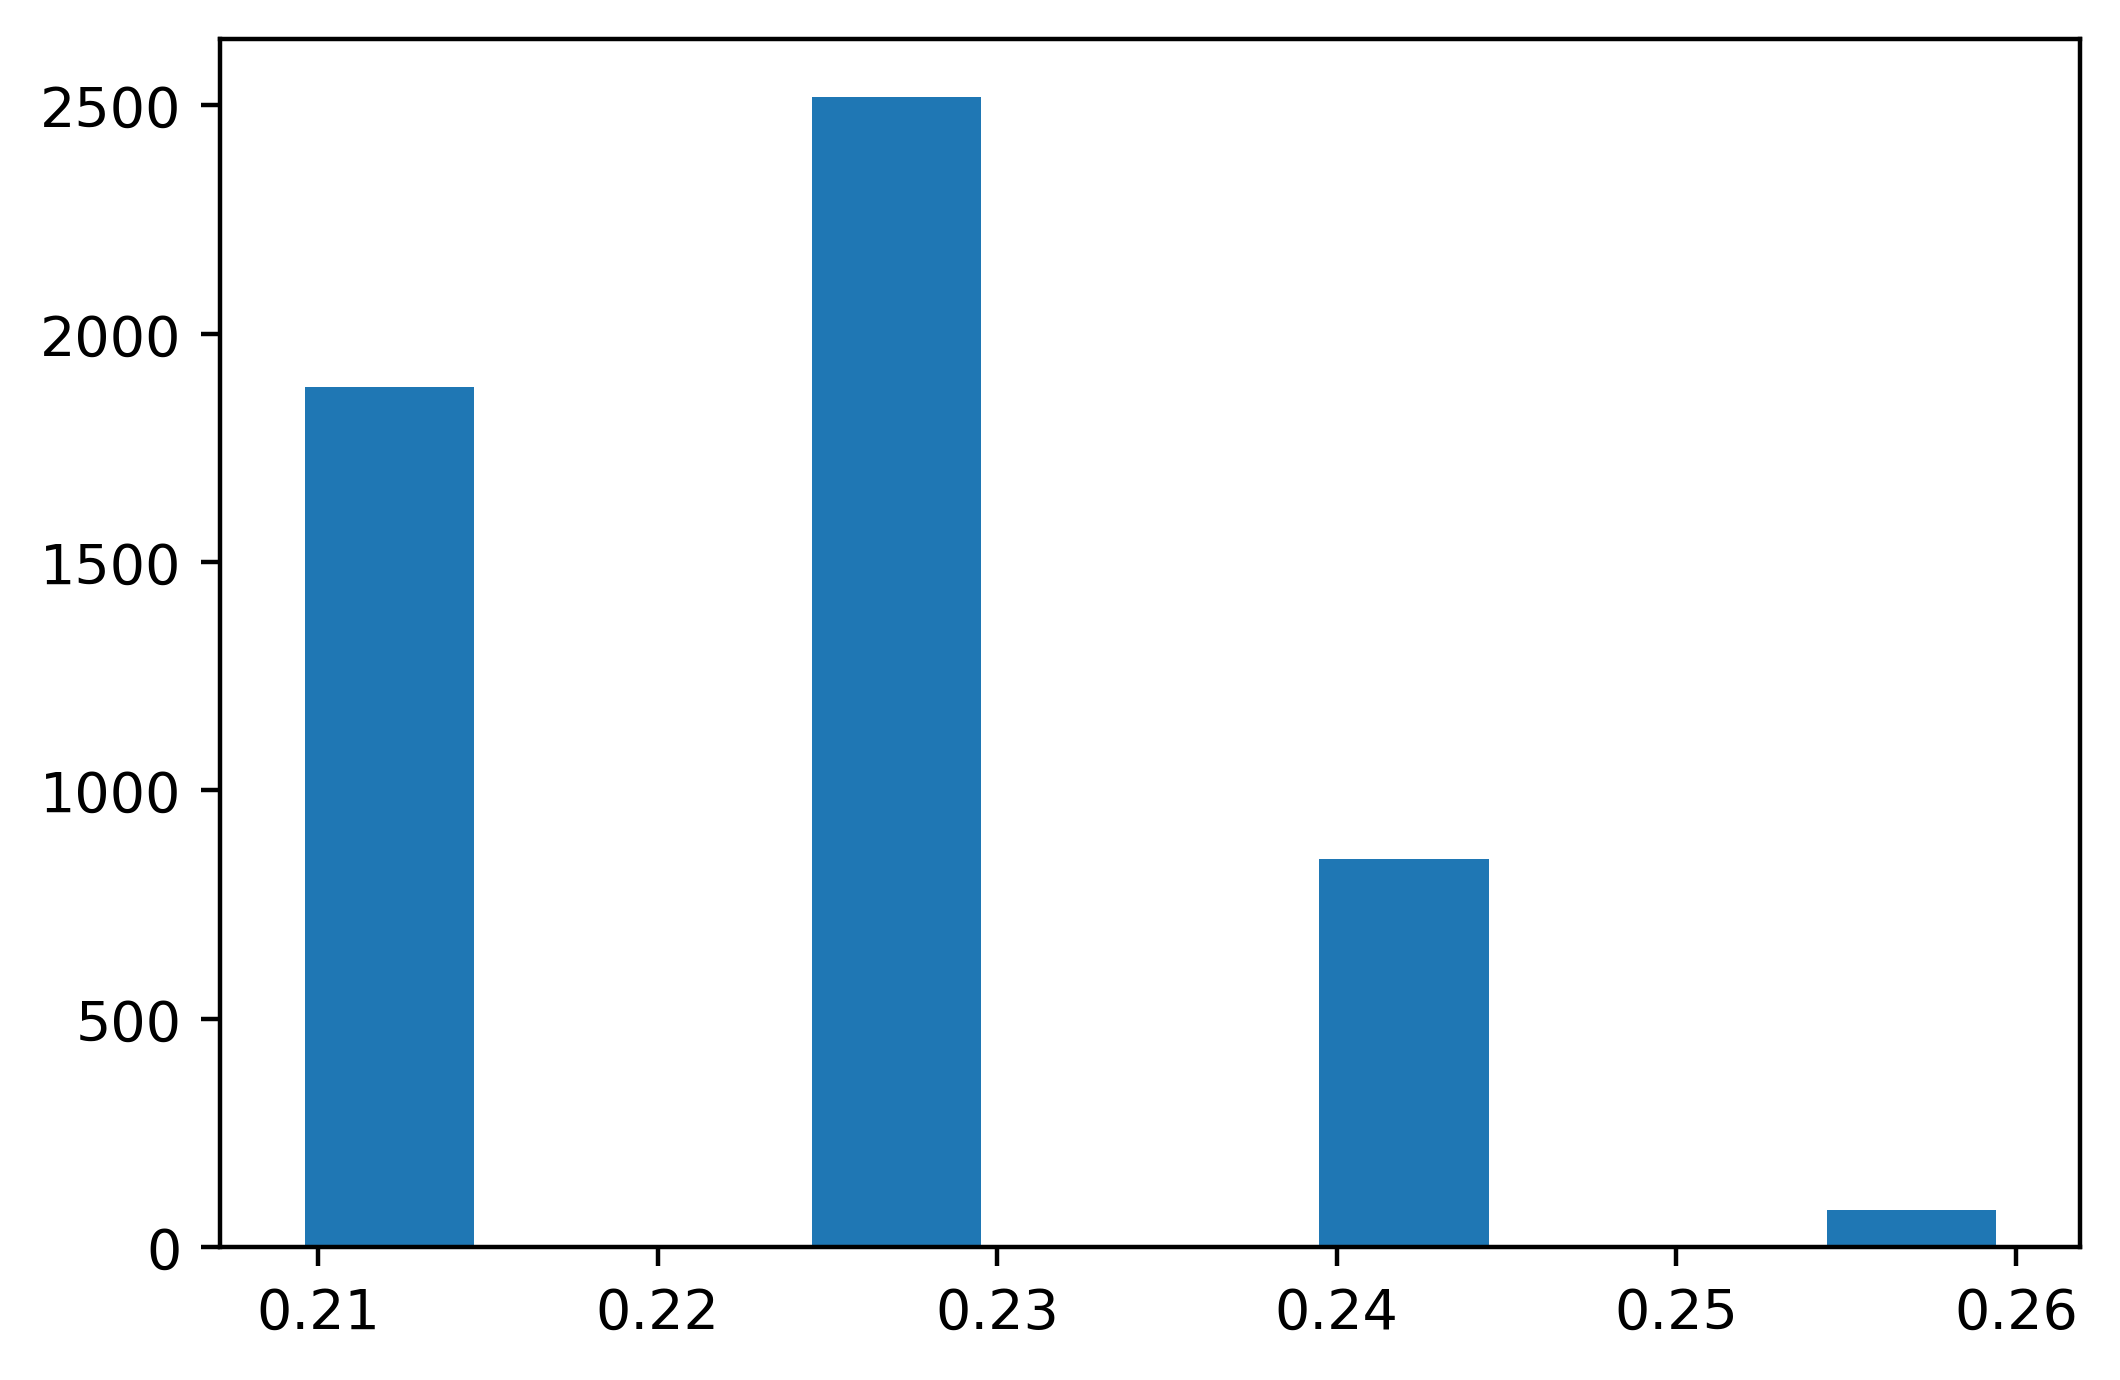

In [38]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

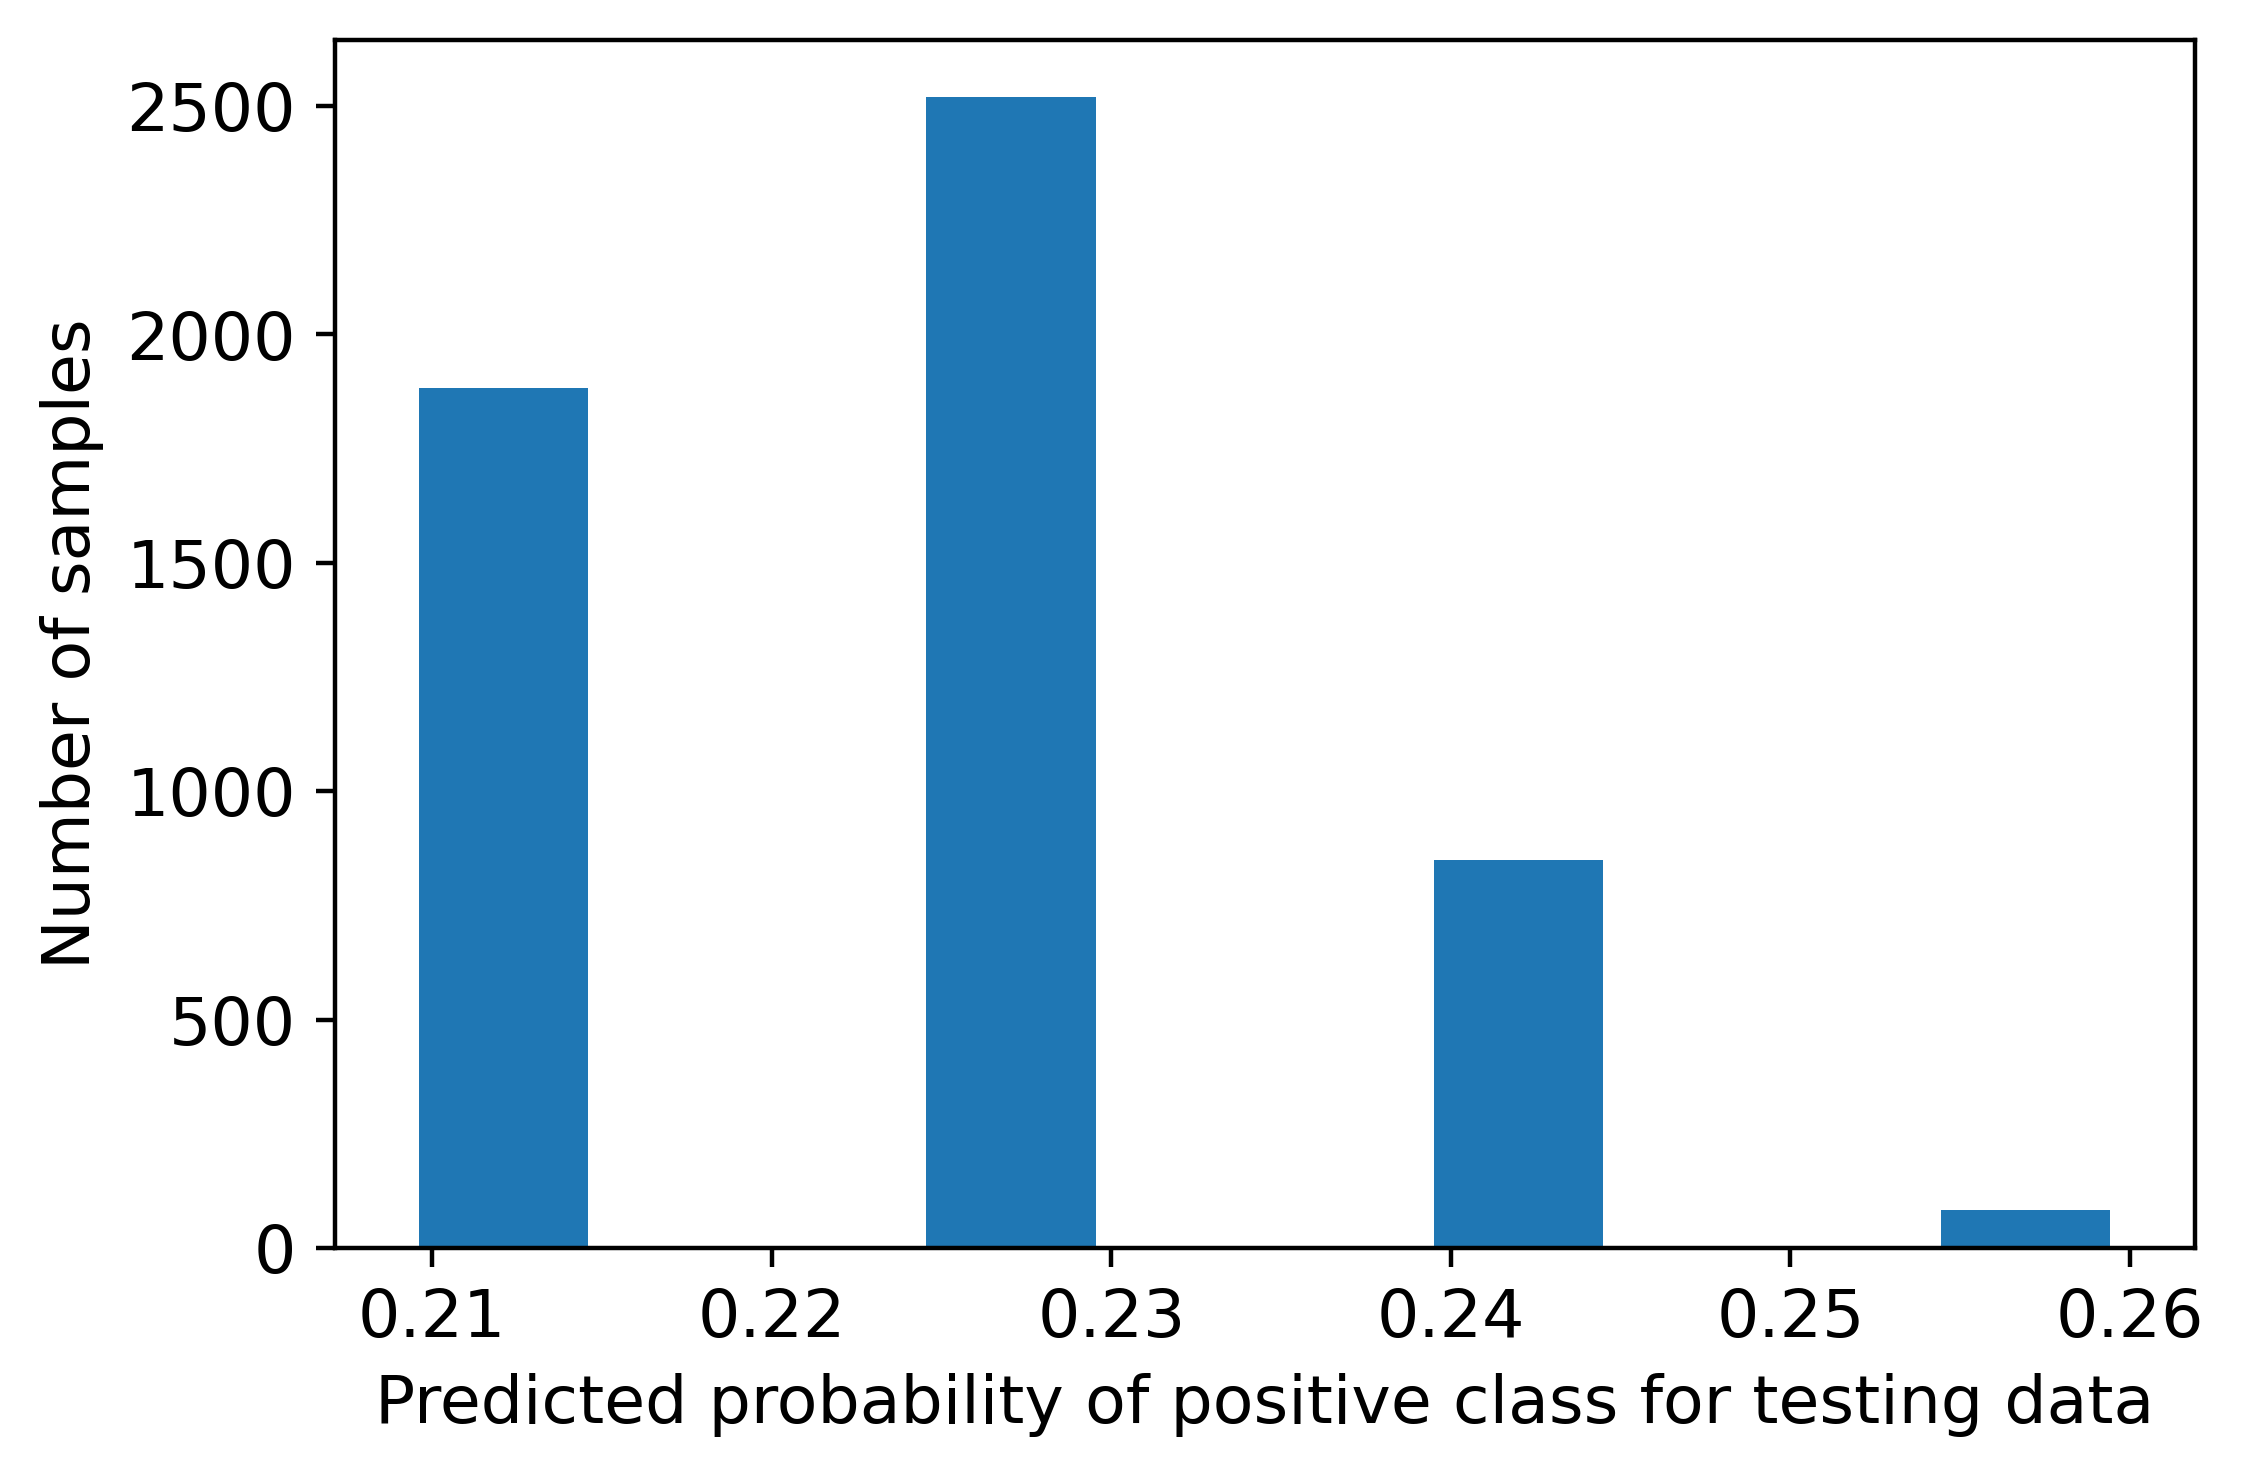

In [39]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

Text(0, 0.5, 'Number of samples')

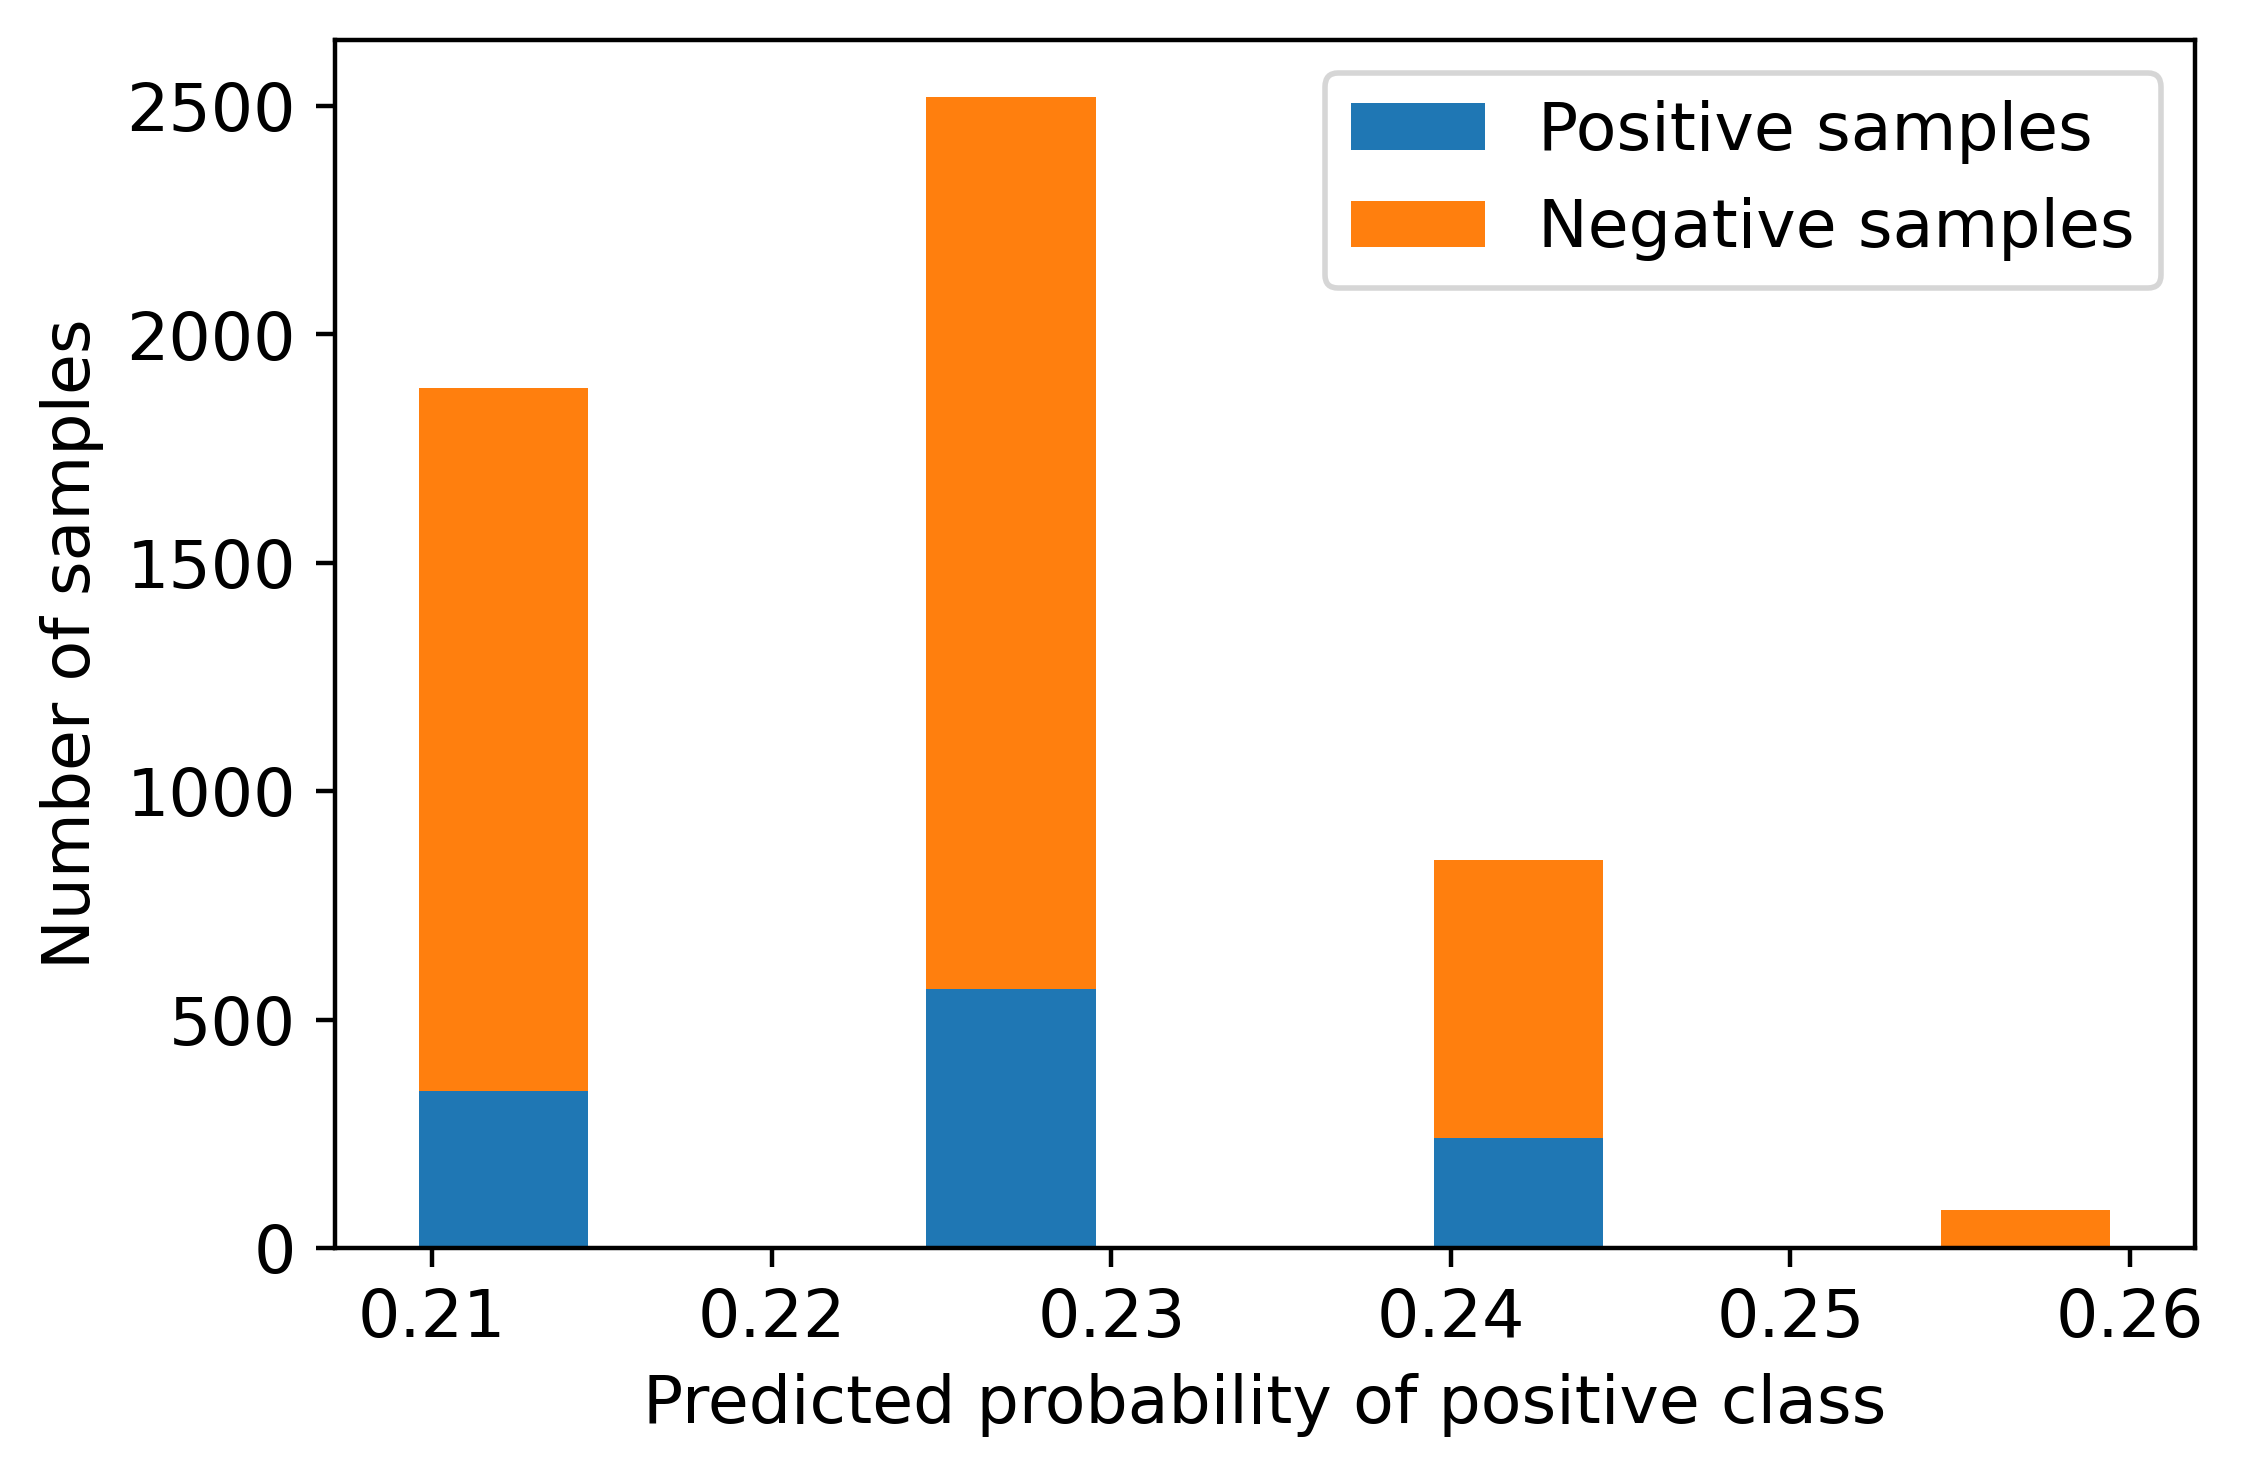

In [40]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Now, plot the ROC curve.**


In [41]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

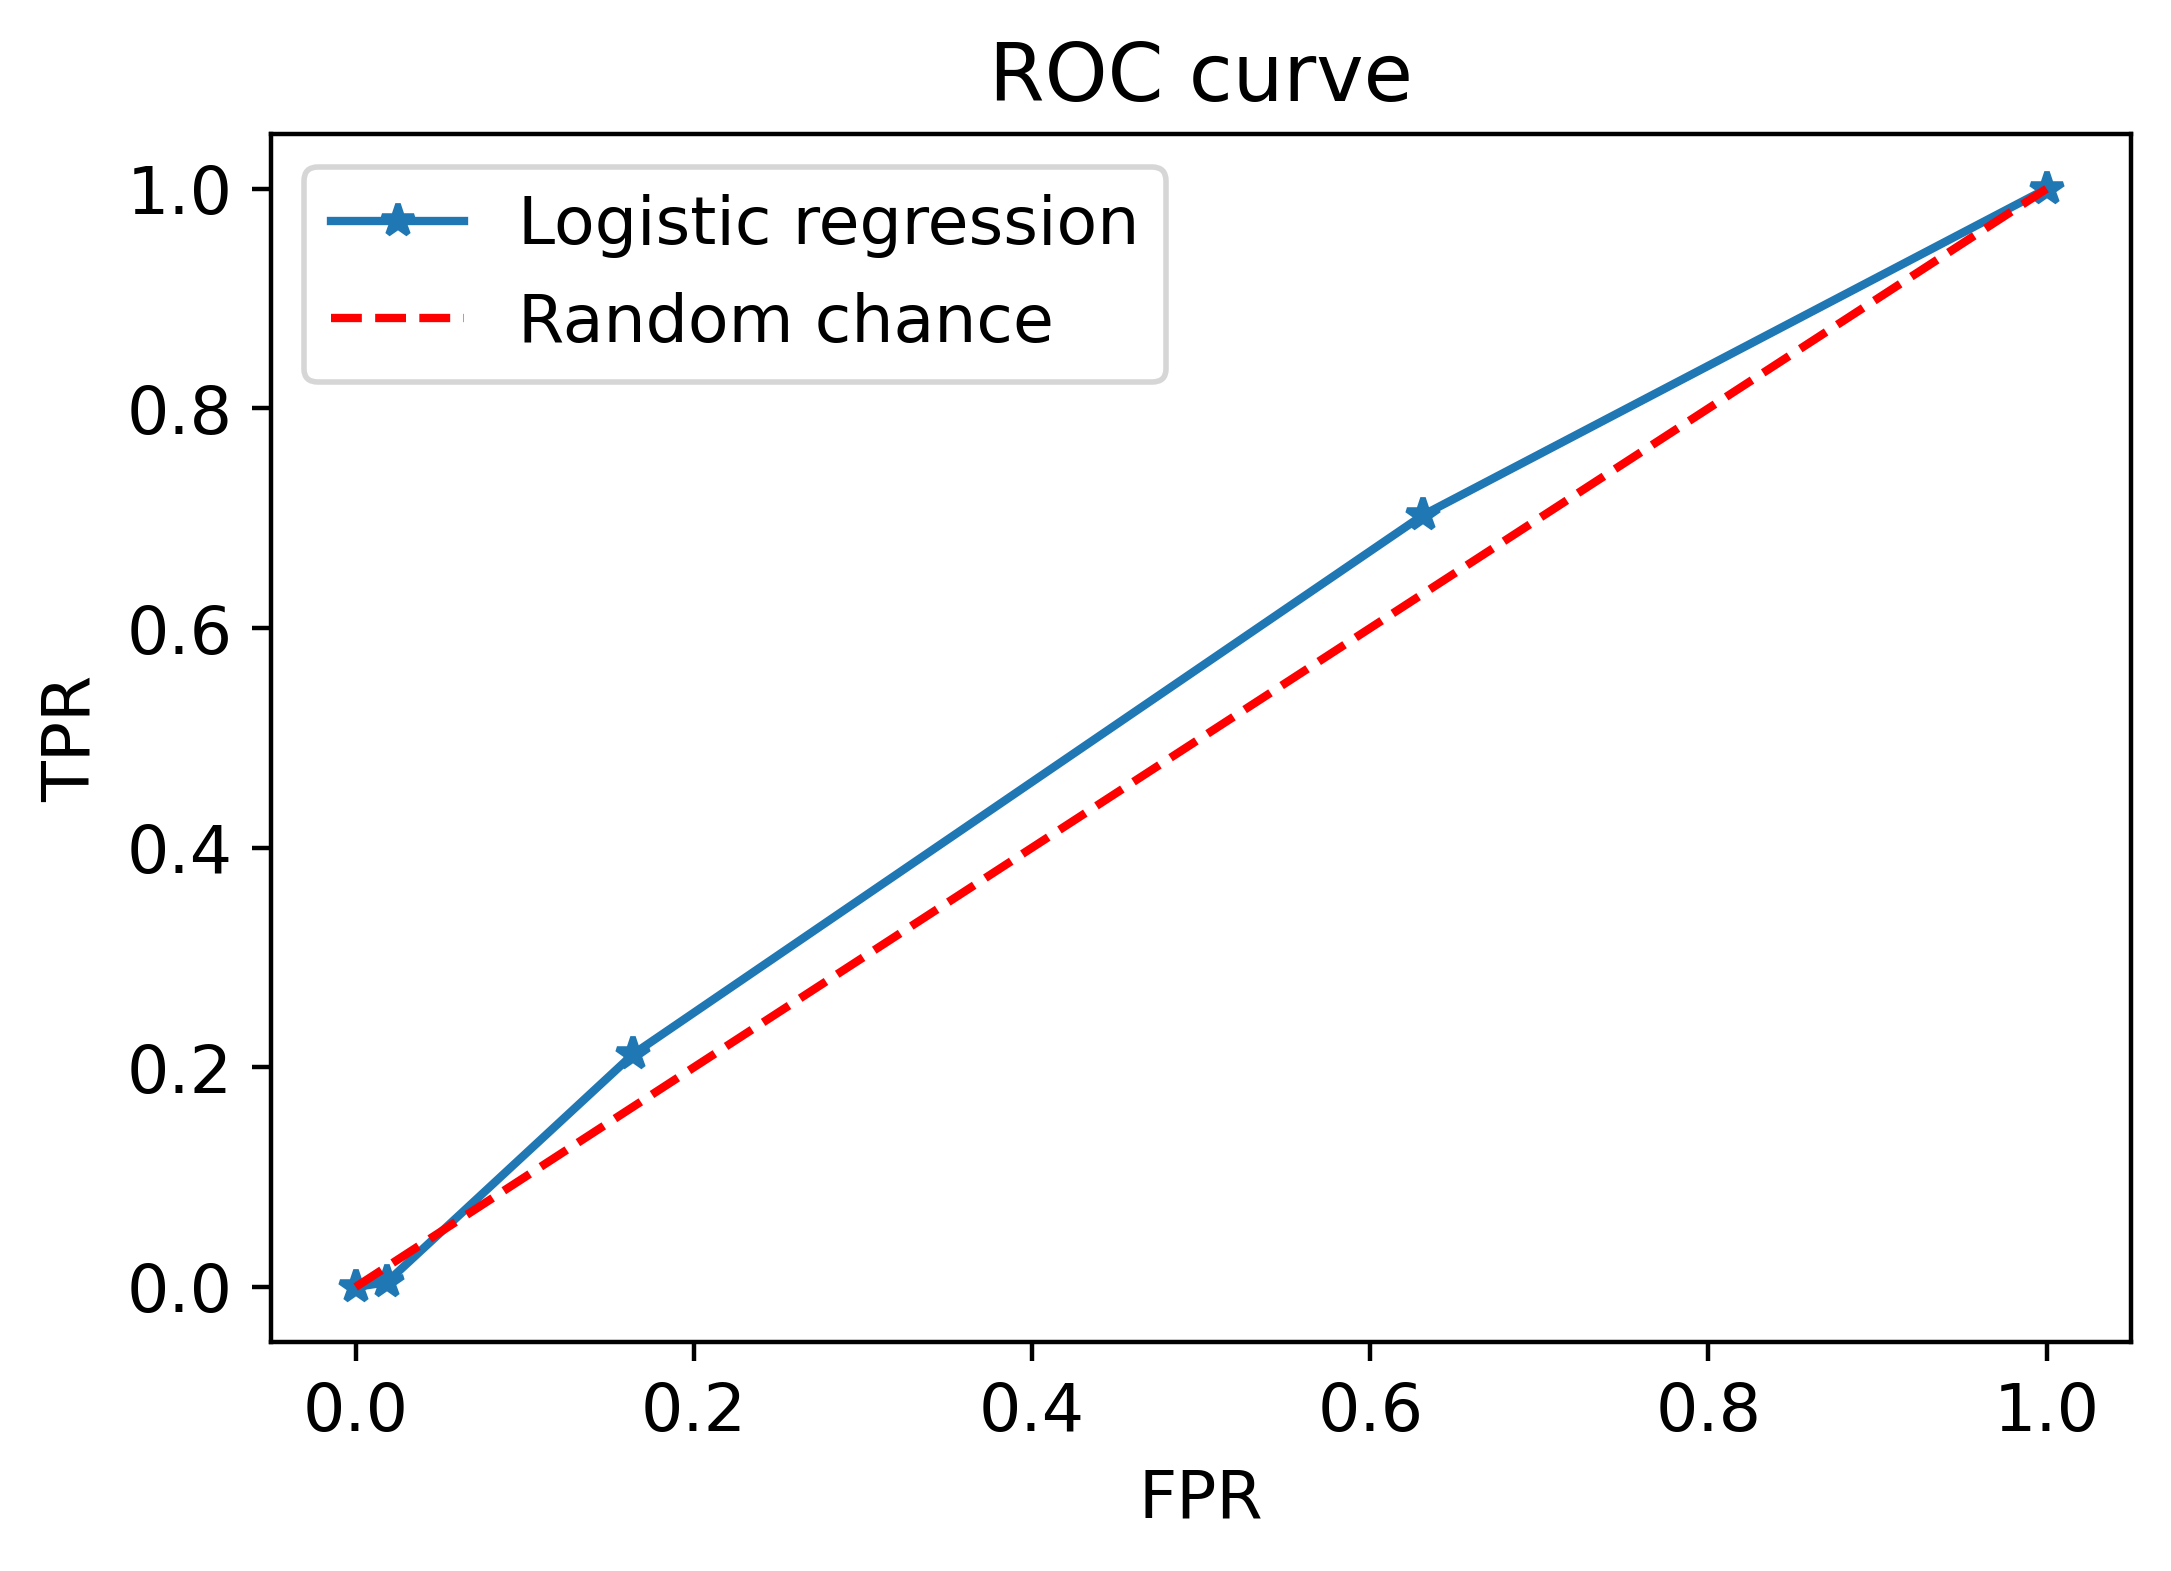

In [42]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [43]:
thresholds

array([1.25941081, 0.25941081, 0.24199568, 0.22539387, 0.20961604])

In [44]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

# Performing Logistic Regression with a New Feature and Creating a Precision-Recall Curve

In [45]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [46]:
example_lr.fit(X_train_2, y_train_2)

C:\Users\rahul\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahul\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahul\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')

In [47]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [48]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [49]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

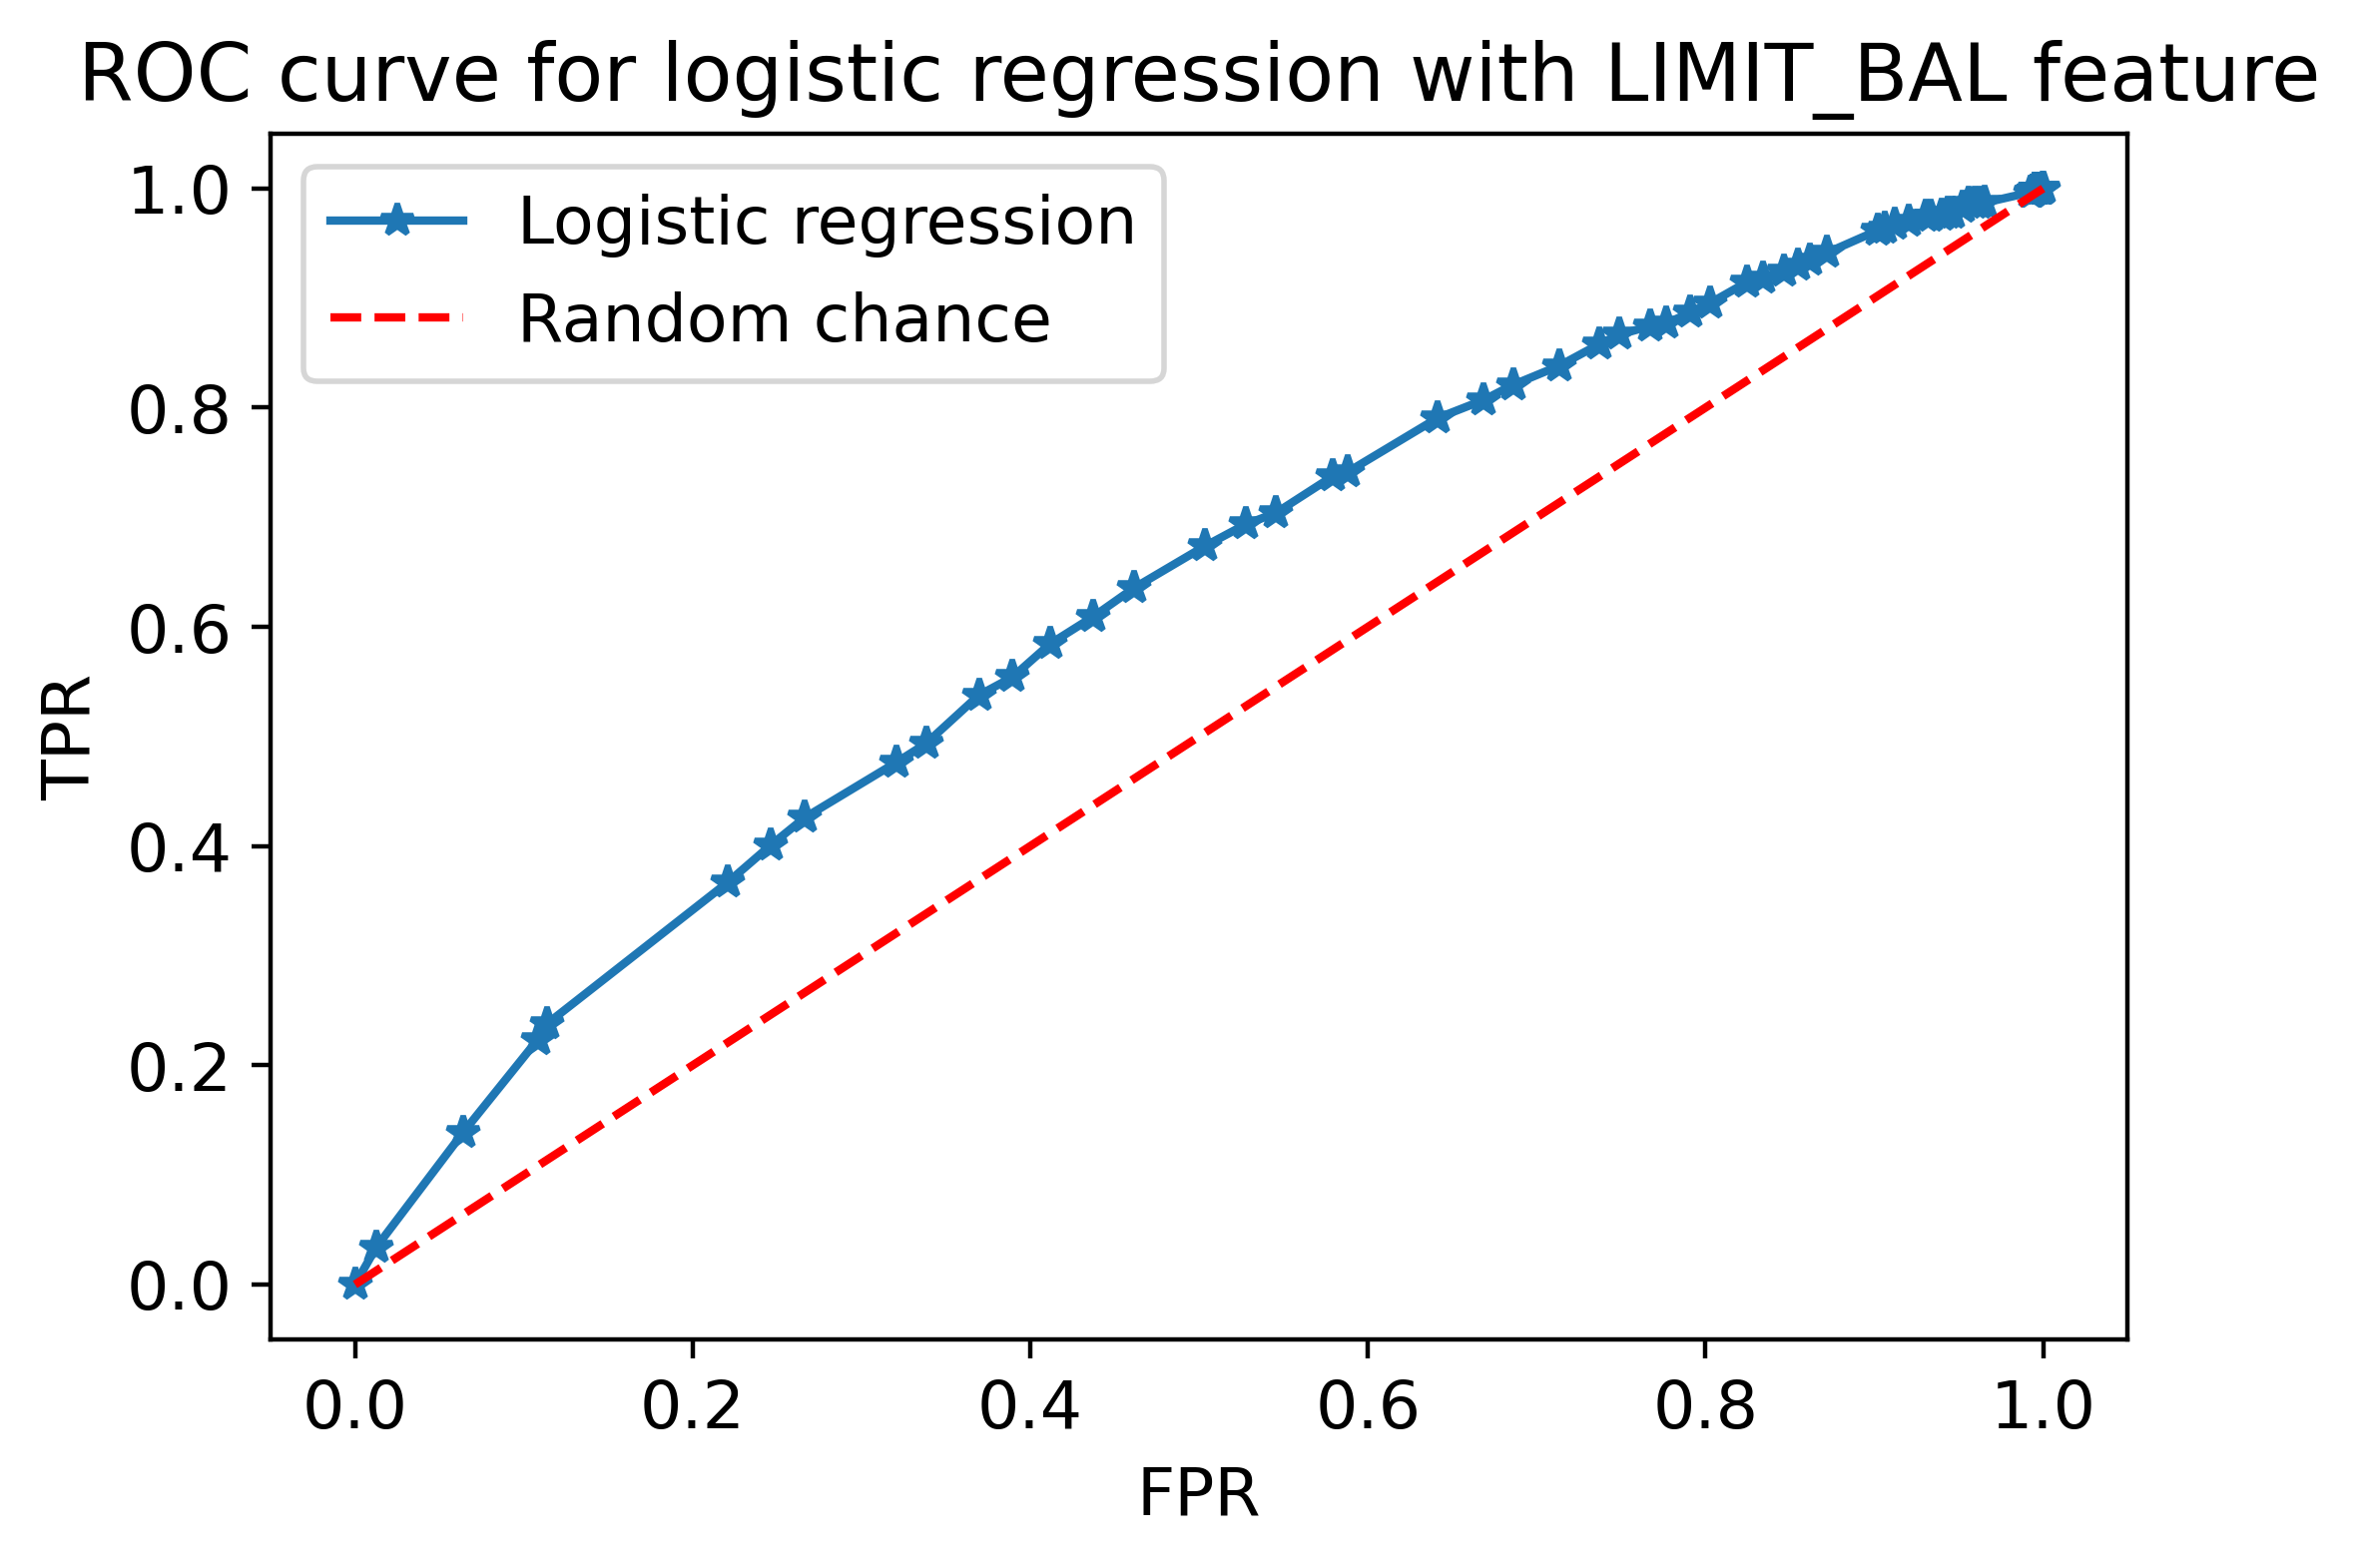

In [50]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

(0.0, 1.0)

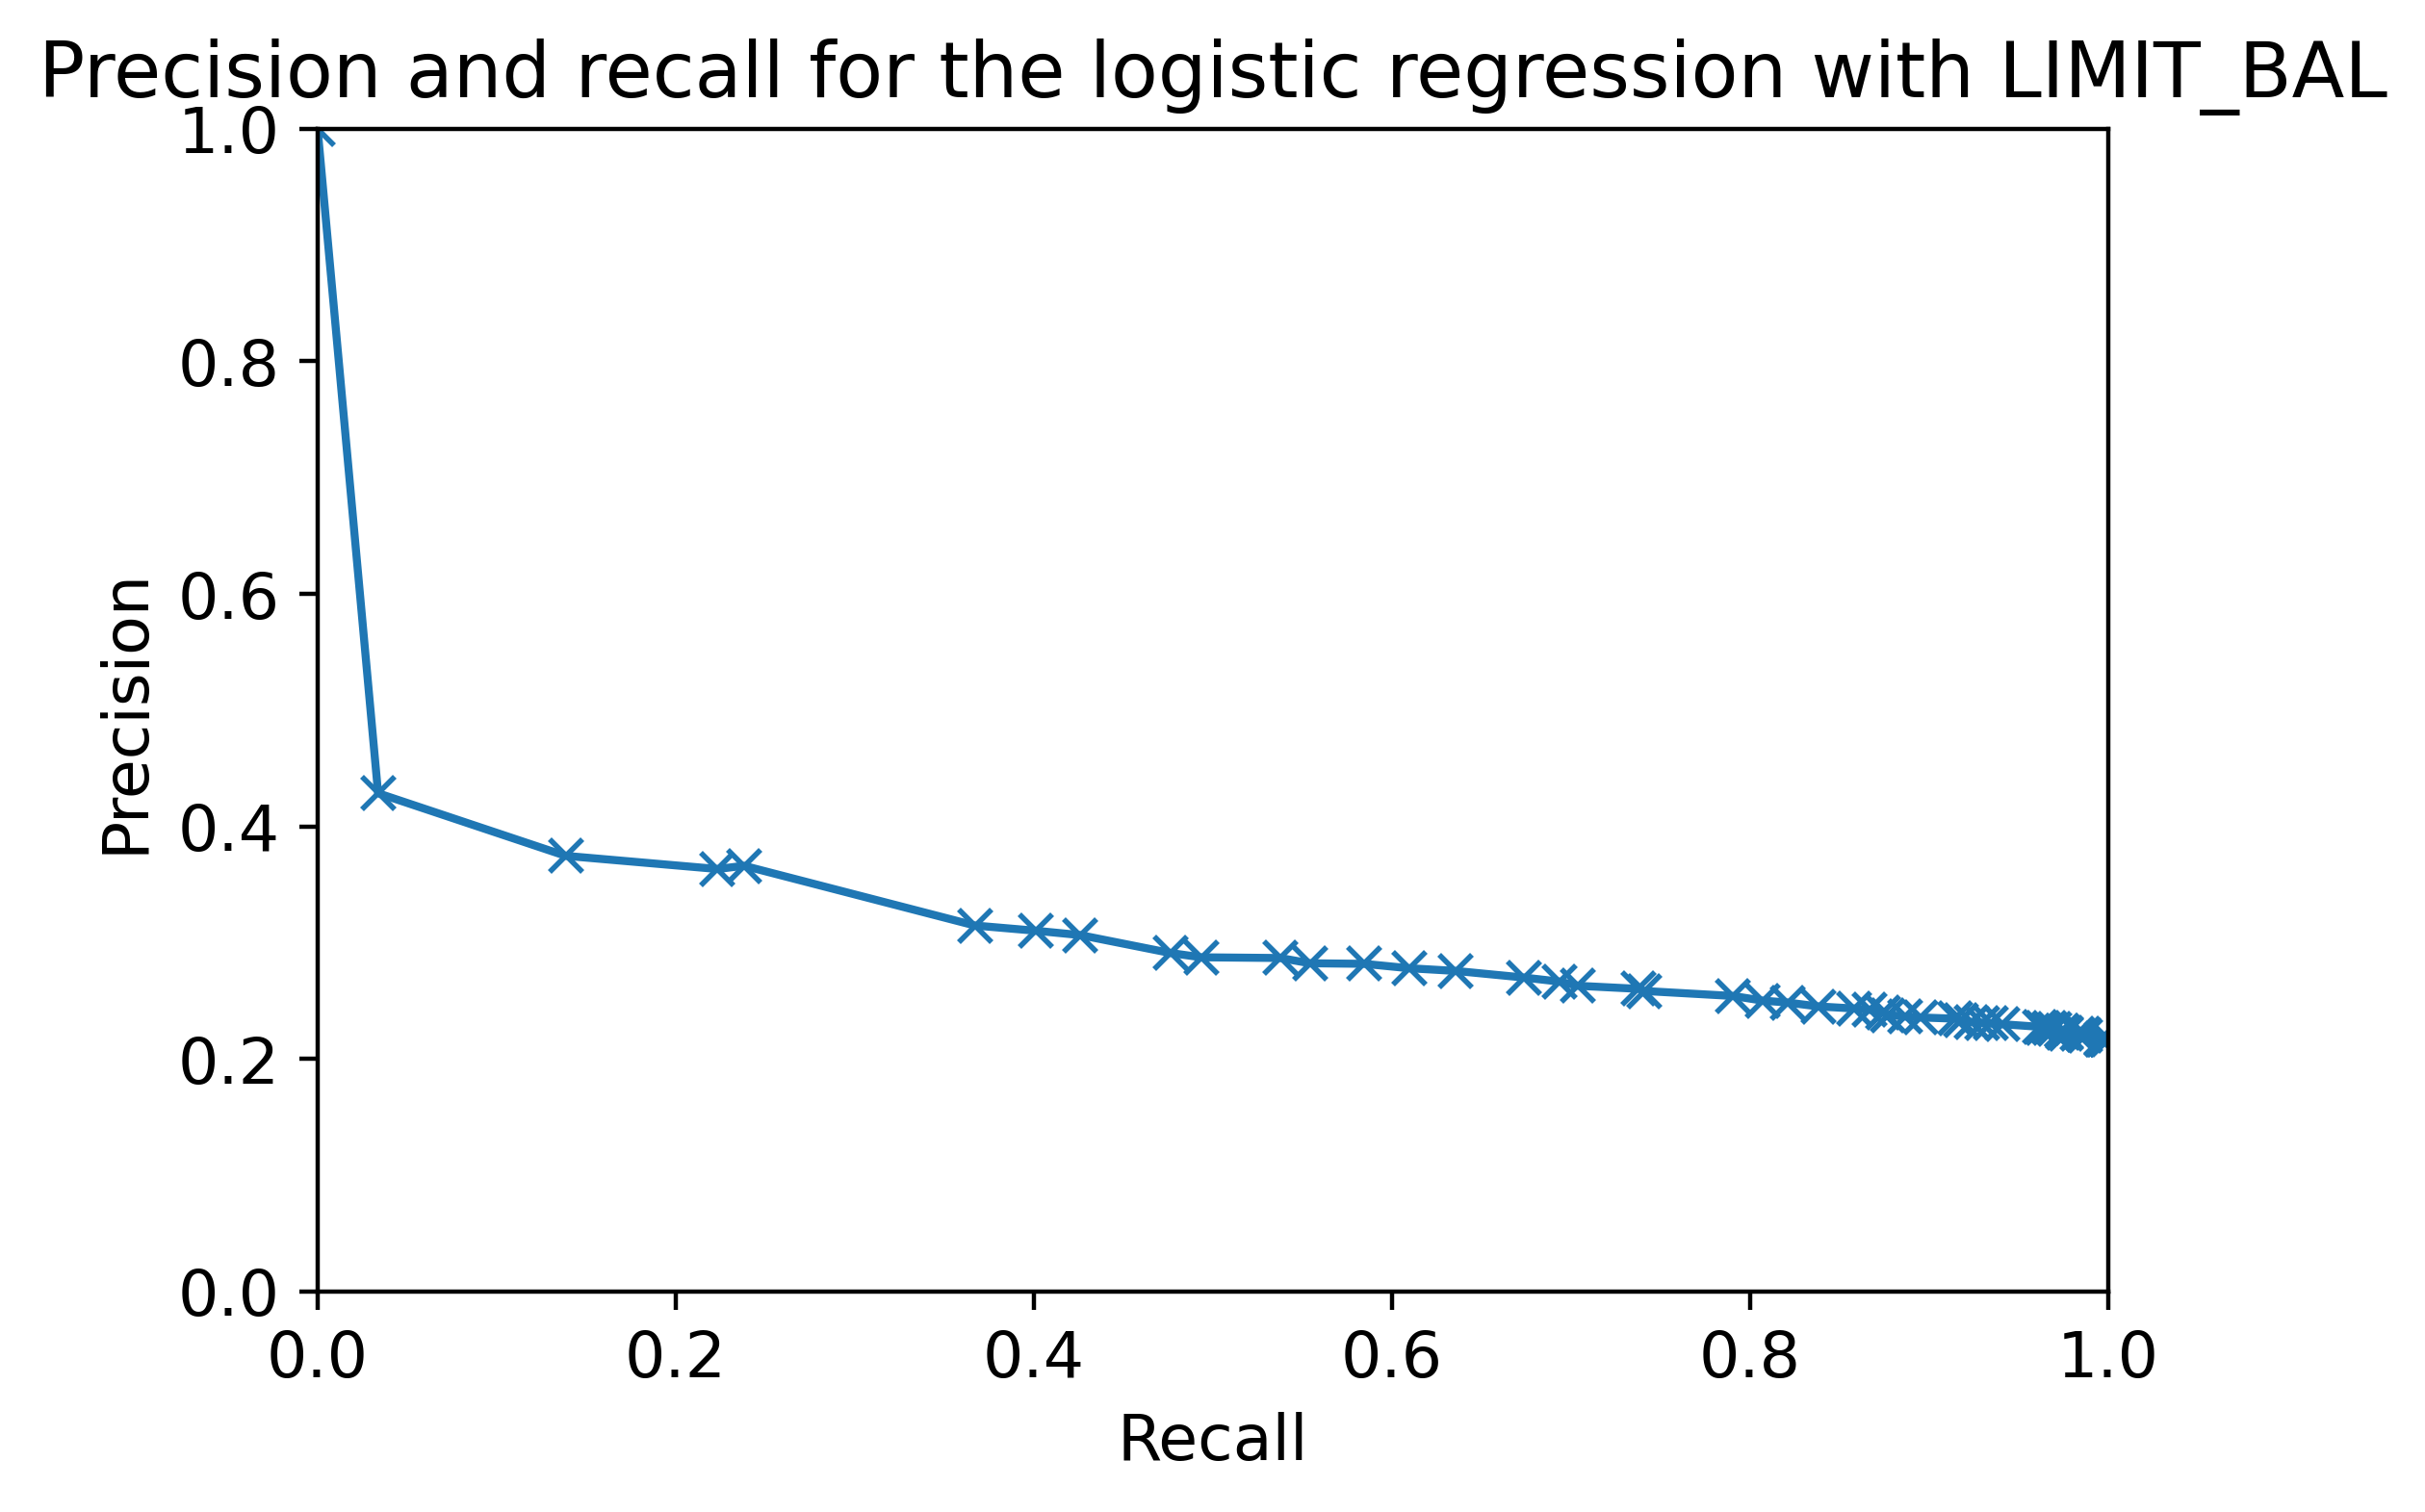

In [51]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [52]:
metrics.auc(recall, precision)

0.31566964427378624

In [53]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
